In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mt

In [6]:
df  = pd.read_csv('../data/cdc_sex_age_state_filtered.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
df.head()

,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,Alabama,Male,0,4.0,260.0,7.0,0.0,8.0,1.0
1,Alabama,Male,1,0.0,57.0,0.0,0.0,0.0,0.0
2,Alabama,Male,5,0.0,76.0,7.0,0.0,0.0,2.0
3,Alabama,Male,15,1.0,644.0,3.0,1.0,7.0,13.0
4,Alabama,Male,25,41.0,1115.0,37.0,14.0,4.0,66.0


In [7]:
summary_df = df.groupby('Sex').agg(np.sum)
prob_df = summary_df.apply(lambda x : x/summary_df['Total Deaths'])
prob_df.columns

Index(['Age Group', 'COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths'],
      dtype='object')

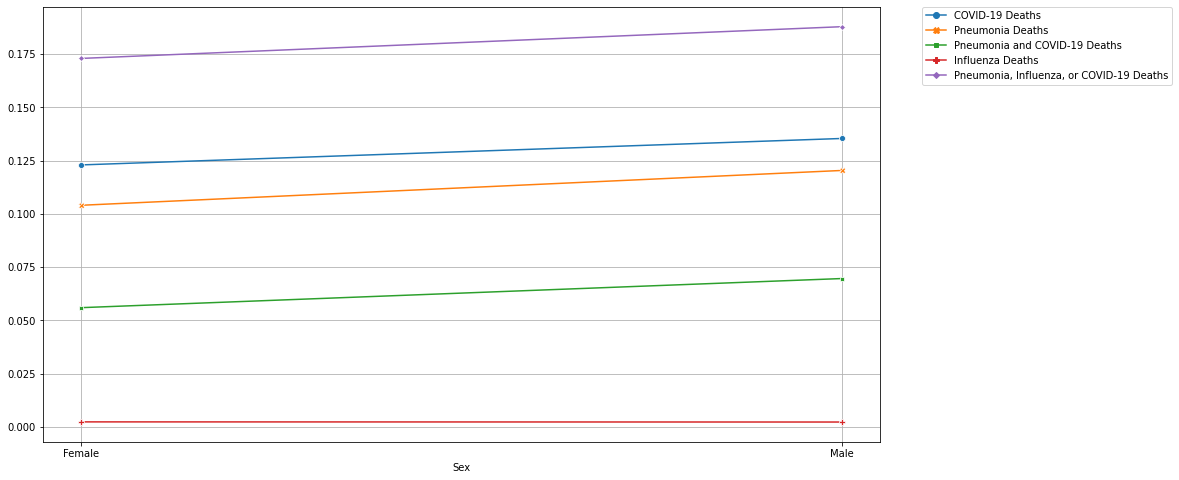

In [8]:
plt.figure(figsize= (15, 8))
sns.lineplot(data= prob_df[['COVID-19 Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths']],   markers=True, dashes=False,)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid()

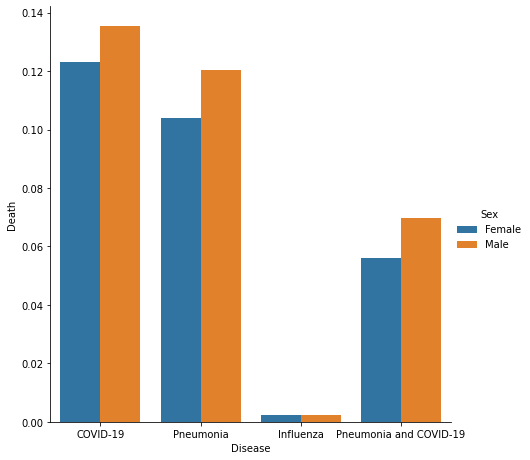

In [9]:
prob_death_df = prob_df[['COVID-19 Deaths', 'Pneumonia Deaths', 'Influenza Deaths',
       'Pneumonia and COVID-19 Deaths']].rename(lambda x: x.replace(' Deaths',''), axis= 1).reset_index()
prob_death_df = pd.melt(prob_death_df, id_vars="Sex", var_name="Disease", value_name="Death")
g = sns.catplot(x='Disease', y='Death', hue='Sex', data=prob_death_df, kind='bar', height= 6.5)

In [10]:
age_summary_df = df.groupby('Age Group').agg(np.sum)
age_prob_df = age_summary_df.apply(lambda x : x/age_summary_df['Total Deaths'])
age_prob_df.head()

,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
Age Group,,,,,,
0,0.007590,1.0,0.018037,0.001161,0.004241,0.017367
1,0.026933,1.0,0.074564,0.005985,0.044638,0.086534
5,0.031187,1.0,0.056816,0.008337,0.032114,0.071329
15,0.019314,1.0,0.022651,0.009231,0.005231,0.035551
25,0.039979,1.0,0.039762,0.018824,0.004960,0.063477


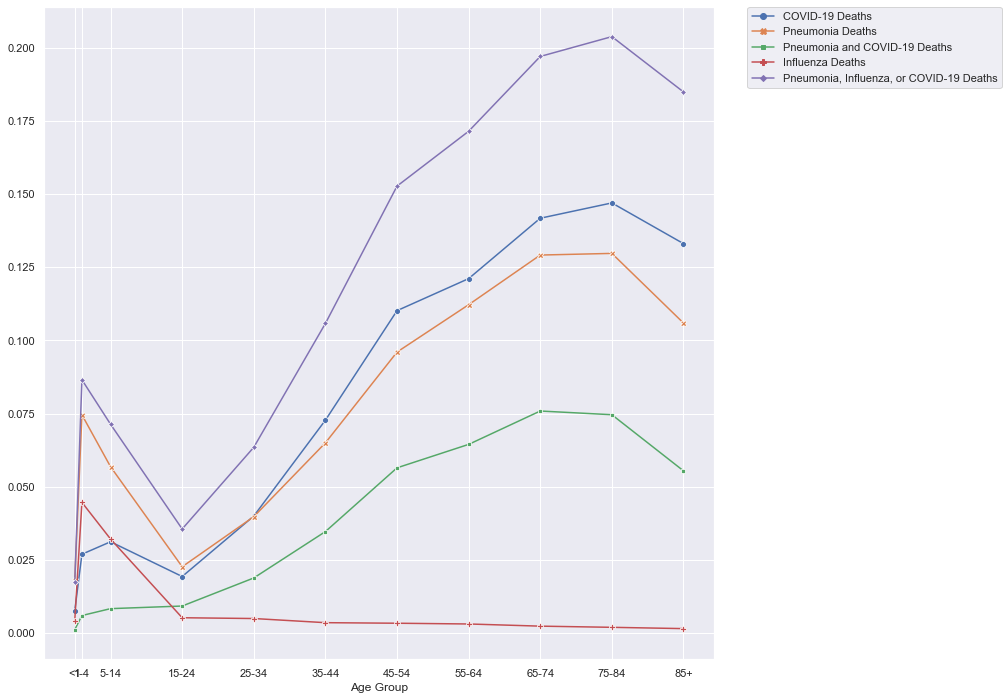

In [11]:
sns.set(rc = {'figure.figsize':(12,12)})
g = sns.lineplot(data= age_prob_df[['COVID-19 Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths']],markers=True, dashes=False)
g.set_xticks(df['Age Group'].unique())
g.set_xticklabels(["<1","1-4","5-14","15-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85+"])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [12]:
total_summary_df = df.groupby(['Sex','Age Group']).agg(np.sum)
total_prob_df = total_summary_df.apply(lambda x : x/total_summary_df['Total Deaths'])
total_prob_df.drop('Total Deaths', axis = 1, inplace = True)
total_prob_df.head()

COVID-19 Deaths  Pneumonia Deaths  \
Sex    Age Group                                      
Female 0                 0.007674          0.019733   
       1                 0.024870          0.097166   
       5                 0.033219          0.065292   
       15                0.030757          0.034184   
       25                0.049683          0.053024   

                  Pneumonia and COVID-19 Deaths  Influenza Deaths  \
Sex    Age Group                                                    
Female 0                               0.001296          0.004186   
       1                               0.006362          0.048005   
       5                               0.003436          0.042383   
       15                              0.016325          0.010373   
       25                              0.025094          0.008779   

                  Pneumonia, Influenza, or COVID-19 Deaths  
Sex    Age Group                                            
Female 0                                          0.020929  
       1                                          0.089069  
       5                                          0.084002  
       15                                         0.053847  
       25                                         0.082974

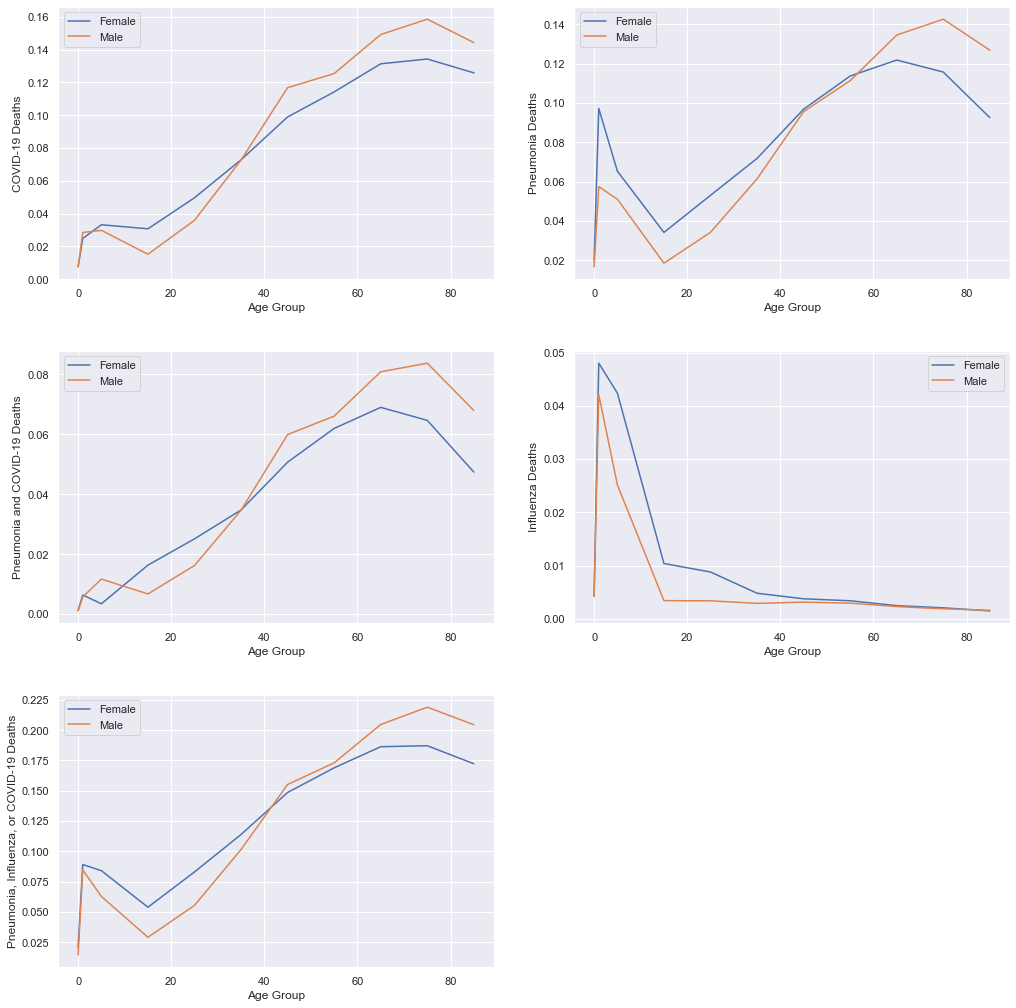

In [13]:
fig, axes = plt.subplots(3,2, figsize= (15,15))
fig.delaxes(axes[2][1])
fig.tight_layout(pad=4.0)
i = 0
j = 0
for disease in total_prob_df.columns:
    for sex in total_prob_df.index.levels[0]:
        sns.lineplot(x = total_prob_df.loc[sex].index,y = total_prob_df.loc[sex][disease], markers=True, dashes=False, label = sex, ax = axes[i][j])
    if(j == len(axes[0]) - 1):
        i+=1
        j=-1
    j+=1

In [14]:
total_prob_df.sort_values(by = 'COVID-19 Deaths', ascending= False)

COVID-19 Deaths  Pneumonia Deaths  \
Sex    Age Group                                      
Male   75                0.158530          0.142513   
       65                0.149174          0.134447   
       85                0.144266          0.126748   
Female 75                0.134252          0.115657   
       65                0.131340          0.121755   
       85                0.125817          0.092473   
Male   55                0.125382          0.111279   
       45                0.116786          0.095542   
Female 55                0.114203          0.113639   
       45                0.098941          0.096784   
       35                0.072819          0.071782   
Male   35                0.072694          0.061409   
Female 25                0.049683          0.053024   
Male   25                0.035933          0.034233   
Female 5                 0.033219          0.065292   
       15                0.030757          0.034184   
Male   5                 0.029808          0.051063   
       1                 0.028496          0.057431   
Female 1                 0.024870          0.097166   
Male   15                0.015243          0.018548   
Female 0                 0.007674          0.019733   
Male   0                 0.007521          0.016660   

                  Pneumonia and COVID-19 Deaths  Influenza Deaths  \
Sex    Age Group                                                    
Male   75                              0.083685          0.001869   
       65                              0.080817          0.002285   
       85                              0.067898          0.001587   
Female 75                              0.064608          0.002055   
       65                              0.068945          0.002460   
       85                              0.047365          0.001471   
Male   55                              0.066027          0.002925   
       45                              0.059875          0.003122   
Female 55                              0.061935          0.003376   
       45                              0.050665          0.003747   
       35                              0.034716          0.004792   
Male   35                              0.034642          0.002888   
Female 25                              0.025094          0.008779   
Male   25                              0.016210          0.003368   
Female 5                               0.003436          0.042383   
       15                              0.016325          0.010373   
Male   5                               0.011664          0.025143   
       1                               0.005699          0.042087   
Female 1                               0.006362          0.048005   
Male   15                              0.006707          0.003402   
Female 0                               0.001296          0.004186   
Male   0                               0.001051          0.004286   

                  Pneumonia, Influenza, or COVID-19 Deaths  
Sex    Age Group                                            
Male   75                                         0.218941  
       65                                         0.204651  
       85                                         0.204449  
Female 75                                         0.187121  
       65                                         0.186333  
       85                                         0.172253  
Male   55                                         0.173025  
       45                                         0.155170  
Female 55                                         0.168900  
       45                                         0.148539  
       35                                         0.113870  
Male   35                                         0.101536  
Female 25                                         0.082974  
Male   25                                         0.055350  
Female 5                                          0.084002  
   

In [15]:
def feature_engineering(df):
    norm_df = df.apply(lambda col : col/col.max())
    norm_df =  norm_df.reset_index()
    norm_df['Cov_Pos'] = [[1,0] for _ in range(len(norm_df))]
    norm_df['Cov_Neg'] = [[0,1] for _ in range(len(norm_df))]
    norm_df = norm_df.explode(['Cov_Pos','Cov_Neg'])
    norm_df['Pne_Pos'] = [[1,0] for _ in range(len(norm_df))]
    norm_df['Pne_Neg'] = [[0, 0] for _ in range(len(norm_df))]
    norm_df = norm_df.explode(['Pne_Pos','Pne_Neg'])
    norm_df = norm_df[~( (norm_df['Cov_Pos'] == 0) & (norm_df['Pne_Pos'] == 0) )]
    norm_df = pd.get_dummies(data = norm_df, columns= ['Sex', 'Age Group'])
    norm_df['Death'] = 0
    norm_df['position'] = np.arange(norm_df.shape[0])
    norm_df.set_index('position', inplace= True)
    filter = norm_df[(norm_df['Cov_Pos'] == 1) & (norm_df['Pne_Pos'] == 0)]
    norm_df.loc[filter.index, 'Death'] = filter['COVID-19 Deaths']
    filter = norm_df[(norm_df['Cov_Pos'] == 0) & (norm_df['Pne_Pos'] == 1)]
    norm_df.loc[filter.index, 'Death'] = filter['Pneumonia Deaths']
    filter = norm_df[(norm_df['Cov_Pos'] == 1) & (norm_df['Pne_Pos'] == 1)]
    norm_df.loc[filter.index, 'Death'] = filter['Pneumonia and COVID-19 Deaths']
    norm_df.drop(['COVID-19 Deaths', 'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths',
       'Influenza Deaths', 'Pneumonia, Influenza, or COVID-19 Deaths'], axis =1, inplace = True)
    return norm_df

In [16]:
def get_input(df):
    conditions = [df ['Age'] < 1,
    (df ['Age'] >= 1) & (df ['Age'] < 5),
    (df ['Age'] >= 5) & (df ['Age'] < 15),
    (df ['Age'] >= 15) & (df ['Age'] < 25),
    (df ['Age'] >= 25) & (df ['Age'] < 35),
    (df ['Age'] >= 35) & (df ['Age'] < 45),
    (df ['Age'] >= 45) & (df ['Age'] < 55),
    (df ['Age'] >= 55) & (df ['Age'] < 65),
    (df ['Age'] >= 65) & (df ['Age'] < 75),
    (df ['Age'] >= 75) & (df ['Age'] < 85),
    (df ['Age'] >= 85)
    ]
    values = [0,1,5,15,25,35,45,55,65,75,85]
    df['Age Group'] = np.select(condlist= conditions, choicelist= values)
    return df

In [17]:
norm_df =  feature_engineering(total_prob_df)
norm_df

,Cov_Pos,Cov_Neg,Pne_Pos,Pne_Neg,Sex_Female,Sex_Male,Age Group_0,Age Group_1,Age Group_5,Age Group_15,Age Group_25,Age Group_35,Age Group_45,Age Group_55,Age Group_65,Age Group_75,Age Group_85,Death
position,,,,,,,,,,,,,,,,,,
0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.015482
1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.048407
2,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.138464
3,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.076024
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.156878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1.000000
62,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1.000000
63,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.811355


In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(norm_df[['Cov_Pos', 'Cov_Neg', 'Pne_Pos', 'Pne_Neg', 'Sex_Female', 'Sex_Male',
       'Age Group_0', 'Age Group_1', 'Age Group_5', 'Age Group_15',
       'Age Group_25', 'Age Group_35', 'Age Group_45', 'Age Group_55',
       'Age Group_65', 'Age Group_75', 'Age Group_85']], norm_df['Death'])


LinearRegression()

In [19]:
input = pd.DataFrame({'Sex': ['Female', 'Male'], 'Age': [17, 70], 'Cov_Pos': [1,1], 'Pne_Pos': [0,1]})
get_input(input)

,Sex,Age,Cov_Pos,Pne_Pos,Age Group
0,Female,17,1,0,15
1,Male,70,1,1,65


Next Steps:
1) One hot encode the above input dataframe so that it matches the input of our model, then have a look at the predictions. Ideally, the second row (70 year old male) should have a higher risk output.
2) Instead of using the entire 'United States by Total Time period' granularity level which leads to a dataframe with only 1 training sample per category (Sex, Age Group), just pass the entire data on a 'monthly granularity level'. The above code should work for the new data with barely any tweaks. You can also split some of the data and keep it aside as validation dataset.